# Task 

Check transaction data - look for inconsistencies, missing data across data sets, outliers, correctly identified category items, numeric data across all tables. 

Check customer data - check for the same issues on customer data, look for zeros and if you are satisfied, merge the transaction and customer data so that it is ready for analysis.

Analyze data and customer segments - in the analysis determine the metrics - look at total sales, causes of sales, where the highest sales came from, etc. Explore the data, create charts and graphs and note trends and/or insights. 

Deep dive into the customer segments - determine recommendations from the insights, determine which segments we should target, whether the package sizes are relative and make overall conclusions based on the analysis. 


In [1]:
# set up environtment
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from matplotlib.dates import DateFormatter
pd.plotting.register_matplotlib_converters()
%matplotlib inline


### Examine transaction data

In [2]:
# Import data
transaction_data=pd.read_excel("QVI_transaction_data.xlsx")
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [3]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [4]:
transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [5]:
# Seeing that 'DATE' is not in the correct format
transaction_data["DATE"] = pd.to_datetime(transaction_data["DATE"], origin="1899-12-30",unit="D")
transaction_data['DATE'].head()

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

In [6]:
transaction_data["PROD_NAME_CLEAN"]=transaction_data["PROD_NAME"].str.replace("\d+g", "") 
transaction_data["PROD_SIZE"]=transaction_data["PROD_NAME"].str.extract("(\d+)")    
transaction_data["PROD_NAME"]=transaction_data["PROD_NAME_CLEAN"] 
transaction_data=transaction_data.drop("PROD_NAME_CLEAN", axis=1) 
transaction_data["BRAND_NAME"]=transaction_data["PROD_NAME"].str.split().str[0]    
transaction_data=transaction_data.loc[:, ["DATE", "STORE_NBR", "LYLTY_CARD_NBR", "TXN_ID", "PROD_NBR", "PROD_NAME", "PROD_SIZE", "BRAND_NAME", "PROD_QTY", "TOT_SALES"]]   
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,175,Natural,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,175,CCs,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,170,Smiths,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,175,Smiths,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150,Kettle,3,13.8


In [7]:
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226


<Axes: >

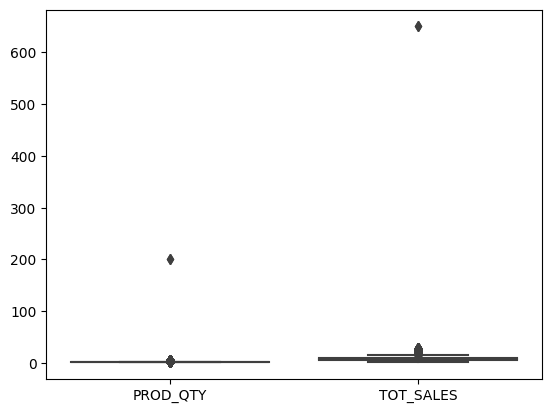

In [8]:
#   Checking for any outliers 
sns.boxplot(data=transaction_data.loc[:,["PROD_QTY","TOT_SALES"]])

In [9]:
# Find the outlier
transaction_data.loc[transaction_data["PROD_QTY"]==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,380,Dorito,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,380,Dorito,200,650.0


There are two transactions where 200 packets of chips are bought in one transaction and both of these transactions were by the same customer.

In [10]:
# Removing the outliers
transaction_data=transaction_data[transaction_data["PROD_QTY"]<100]
transaction_data=transaction_data[transaction_data["TOT_SALES"]<500]
transaction_data=transaction_data.reset_index(drop=True)   
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,175,Natural,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,175,CCs,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,170,Smiths,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,175,Smiths,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150,Kettle,3,13.8


In [11]:
# display min date and max date
min_date = transaction_data["DATE"].min()
max_date = transaction_data["DATE"].max()

print("Min date:", min_date)
print("Max date:", max_date)

Min date: 2018-07-01 00:00:00
Max date: 2019-06-30 00:00:00


In [12]:
# find missing date
pd.date_range(start="2018-07-01", end="2019-06-30").difference(transaction_data["DATE"]) 

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [13]:
import pandas as pd

# Creating a DataFrame with the missing date entry
new_entry = pd.DataFrame({
    "DATE": [pd.to_datetime("2018-12-25")],
    "STORE_NBR": [0],
    "LYLTY_CARD_NBR": [0],
    "TXN_ID": [0],
    "PROD_NBR": [0],
    "PROD_NAME": ["None"],
    "BRAND_NAME": ["None"],
    "PROD_SIZE": ["0g"],
    "PROD_QTY": [0],
    "TOT_SALES": [0],
    "LIFESTAGE": ["None"],
    "PREMIUM_CUSTOMER": ["None"]
})

# Concatenating the new entry to the existing DataFrame
transaction_data = pd.concat([transaction_data, new_entry], ignore_index=True)

# Sorting and resetting index
transaction_data = transaction_data.sort_values(by="DATE").reset_index(drop=True)

# Displaying the DataFrame
print(transaction_data.head())


        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-07-01         35           35143   31702        22   
1 2018-07-01        174          174315  175432        71   
2 2018-07-01         40           40130   36721        63   
3 2018-07-01        220          220035  219501        81   
4 2018-07-01         33           33053   29755        91   

                                PROD_NAME PROD_SIZE BRAND_NAME  PROD_QTY  \
0  Thins Chips         Originl saltd 175g       175      Thins         1   
1         Twisties Cheese     Burger 250g       250   Twisties         2   
2            Kettle 135g Swt Pot Sea Salt       135     Kettle         2   
3         Pringles Original   Crisps 134g       134   Pringles         2   
4                CCs Tasty Cheese    175g       175        CCs         2   

   TOT_SALES LIFESTAGE PREMIUM_CUSTOMER  
0        3.3       NaN              NaN  
1        8.6       NaN              NaN  
2        8.4       NaN              NaN  
3       

In [14]:
result = transaction_data[transaction_data['DATE'] == pd.to_datetime('2018-12-25')]

result.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
129324,2018-12-25,0,0,0,0,None,0g,None,0,0.0,None,None


In [15]:
date_sales=transaction_data.groupby("DATE")["TOT_SALES"].sum().reset_index()   #   Grouping the pandas.DataFrame by the TOT_SALES column for each recorded date.
date_sales.head()

,DATE,TOT_SALES
0,2018-07-01,5372.2
1,2018-07-02,5315.4
2,2018-07-03,5321.8
3,2018-07-04,5309.9
4,2018-07-05,5080.9


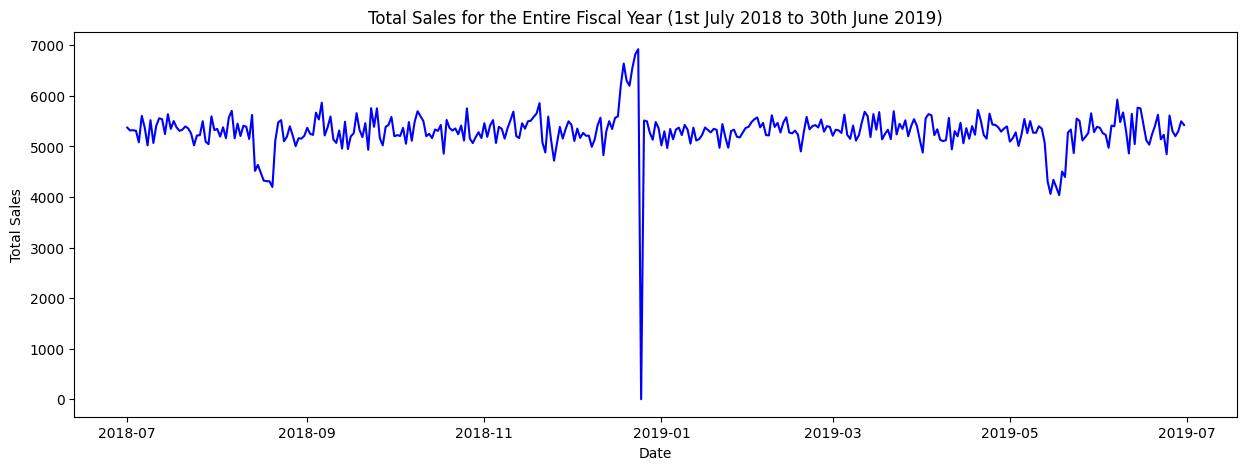

In [16]:
#   Plotting a line graph of the total sales for each date over the entire recorded duration.

plt.figure(figsize=(15, 5))
plt.plot(date_sales["DATE"], date_sales["TOT_SALES"], color="blue")
plt.title("Total Sales for the Entire Fiscal Year (1st July 2018 to 30th June 2019)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

sales hit an all-time high the day before Christmas Day, which makes sense as people tend to buy more food items when approaching the holiday season. on the line graph between December 21 and December 24, meaning that these are the dates that stores can target with promotions and discounts to boost sales even more.

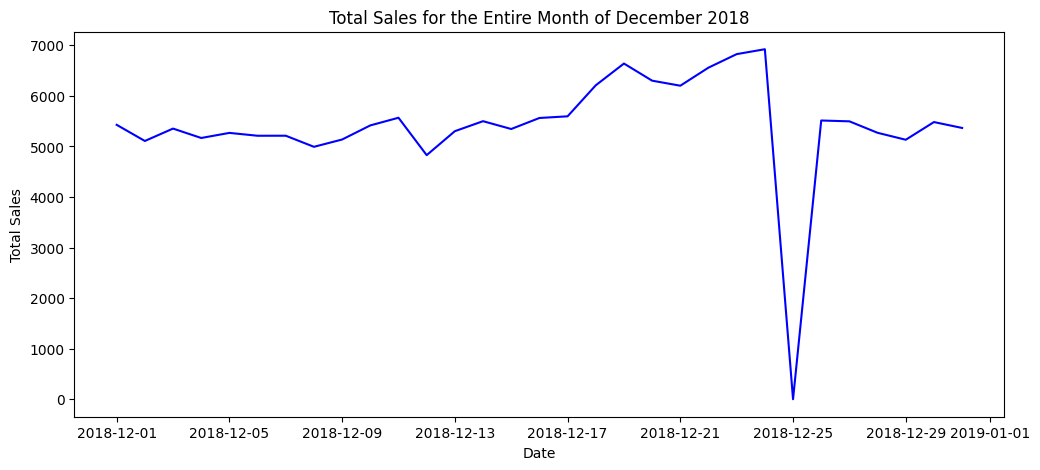

In [17]:
#   Plotting a line graph of the total sales for each recorded date during December 2018.

plt.figure(figsize=(12, 5))
plt.plot(date_sales["DATE"][date_sales["DATE"].dt.month==12], date_sales["TOT_SALES"][date_sales["DATE"].dt.month==12], color="blue")
plt.title("Total Sales for the Entire Month of December 2018")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

sales hit an all-time high the day before Christmas Day, which makes sense as people tend to buy more food items when approaching the holiday season. on the line graph between December 21 and December 24, meaning that these are the dates that stores can target with promotions and discounts to boost sales even more.

In [18]:
holiday_sales=transaction_data[(transaction_data["DATE"]>="2018-12-21") & (transaction_data["DATE"]<="2018-12-24")]  
holiday_sales=holiday_sales.sort_values(by="TOT_SALES") 
holiday_sales=holiday_sales.reset_index(drop=True)  
holiday_sales.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-12-22,127,127448,130458,76,Woolworths Medium Salsa 300g,300,Woolworths,1,1.5,NaN,NaN
1,2018-12-22,136,136114,138499,35,Woolworths Mild Salsa 300g,300,Woolworths,1,1.5,NaN,NaN
2,2018-12-24,38,38005,34012,35,Woolworths Mild Salsa 300g,300,Woolworths,1,1.5,NaN,NaN
3,2018-12-23,255,255077,254619,76,Woolworths Medium Salsa 300g,300,Woolworths,1,1.5,NaN,NaN
4,2018-12-22,186,186218,188613,76,Woolworths Medium Salsa 300g,300,Woolworths,1,1.5,NaN,NaN


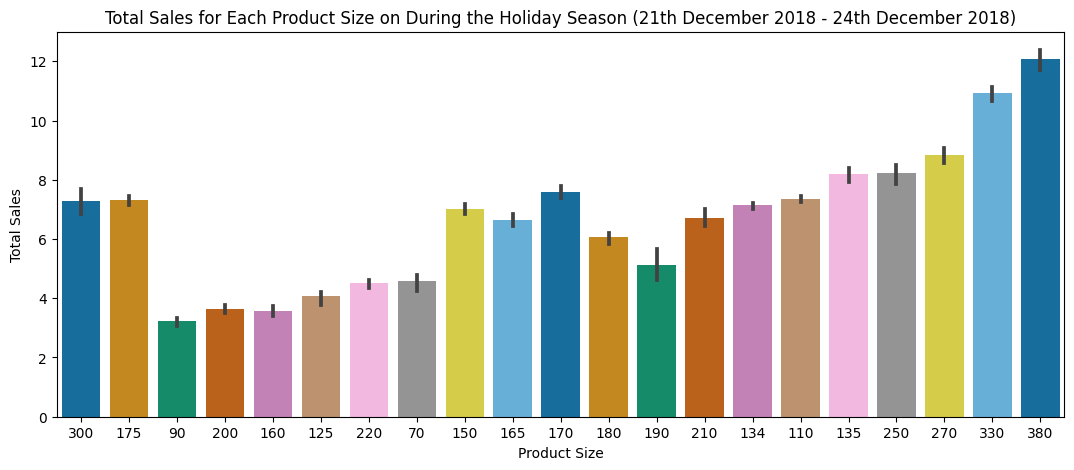

In [19]:
#   Plotting a bar graph of the total sales for each Product size between 21st December 2018 and 24th December 2018.

plt.figure(figsize=(13, 5))
sns.barplot(x="PROD_SIZE", y="TOT_SALES", data=holiday_sales,palette="colorblind")
plt.title("Total Sales for Each Product Size on During the Holiday Season (21th December 2018 - 24th December 2018)")
plt.xlabel("Product Size")
plt.ylabel("Total Sales")
plt.show()

It seems that customers mostly buy the 380 gram pack size (the largest in the store) when the holiday season approaches.


In [20]:
holiday_brands=holiday_sales.groupby("BRAND_NAME")["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False).head(5)   
holiday_brands=holiday_brands.reset_index(drop=True)    
holiday_brands

,BRAND_NAME,TOT_SALES
0,Kettle,4940.0
1,Doritos,2948.5
2,Smiths,2914.5
3,Pringles,2290.3
4,Thins,1343.1


It is known that KETTLE is a top-selling brand during the holiday season, so it would be wise to surround promotions and discounts around it to boost sales.

In [21]:
# show Product sales on 1st July 2018 - 30th June 2019
package_sales=transaction_data.groupby("PROD_SIZE")["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False)  
package_sales=package_sales.reset_index(drop=True)    
package_sales

,PROD_SIZE,TOT_SALES
0,175,485437.4
1,150,304288.5
2,134,177655.5
3,110,162765.4
4,170,146673.0
5,330,136794.3
6,300,113330.6
7,165,101360.6
8,380,75419.6
9,270,55425.4


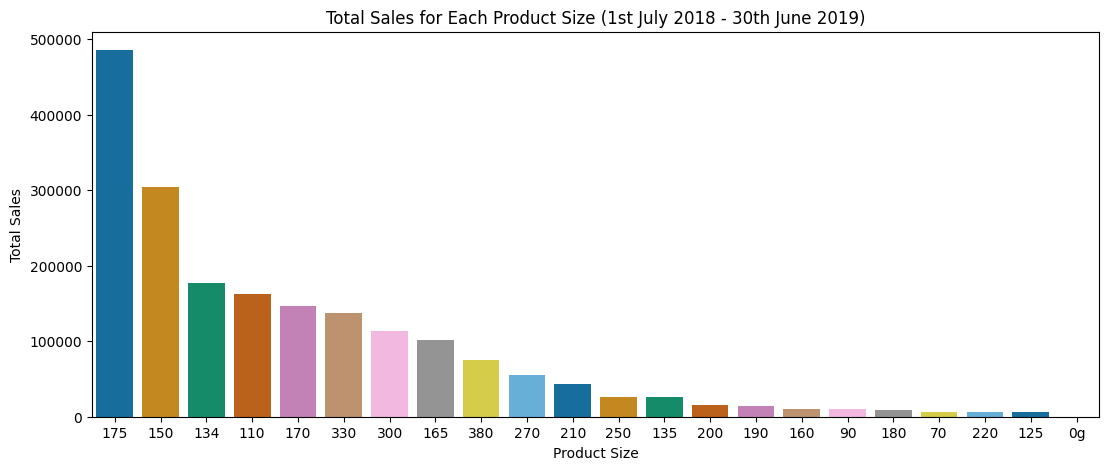

In [22]:
#   Plotting a bar graph of the total sales for each Product size during the entire recorded duration.

plt.figure(figsize=(13, 5))
sns.barplot(x="PROD_SIZE", y="TOT_SALES", data=package_sales,palette="colorblind")
plt.title("Total Sales for Each Product Size (1st July 2018 - 30th June 2019)")
plt.xlabel("Product Size")
plt.ylabel("Total Sales")
plt.show()

it is known the 175 gramme Product size was the highest-selling one over the entire duration of the recorded sales, and even that by nearly 37% from the second highest-selling Product size. Hence, it's clear that the 175 gramme product size is a customer favourite.

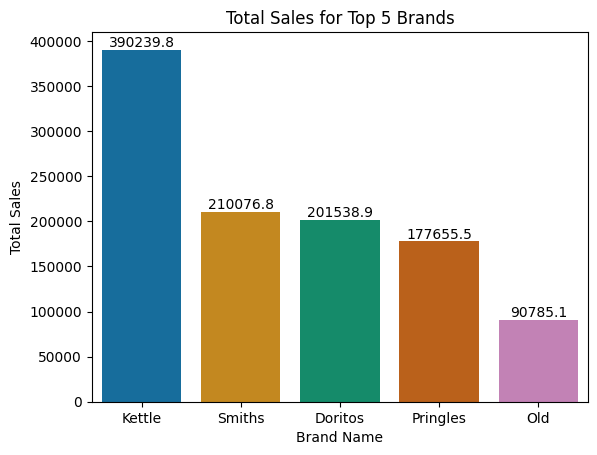

In [23]:
brands_sales = transaction_data.groupby("BRAND_NAME")["TOT_SALES"].sum().reset_index().sort_values(by="TOT_SALES", ascending=False).head()
brands_sales = brands_sales.reset_index(drop=True)
sns.barplot(x="BRAND_NAME", y="TOT_SALES", data=brands_sales, palette="colorblind")
for index, value in enumerate(brands_sales["TOT_SALES"]):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
plt.title("Total Sales for Top 5 Brands")
plt.xlabel("Brand Name")
plt.ylabel("Total Sales")
plt.show()


Text(0.5, 0, 'Transaction')

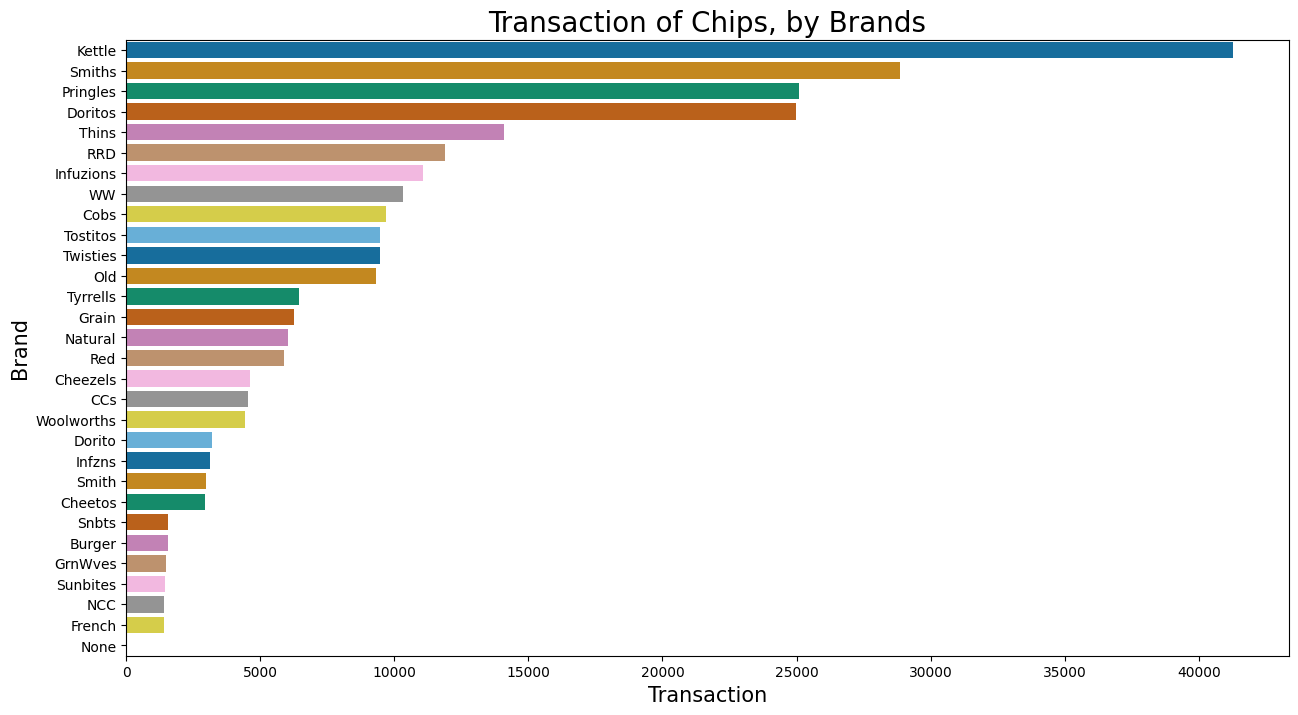

In [24]:
plt.figure(figsize=(15,8))
sns.barplot(x = transaction_data["BRAND_NAME"].value_counts(),y=transaction_data["BRAND_NAME"].value_counts().index, palette='colorblind')
plt.title("Transaction of Chips, by Brands",fontsize=20)
plt.ylabel("Brand",fontsize=15)
plt.xlabel("Transaction",fontsize=15)

## Examine Purchase behavior

In [25]:
purchase_behaviour=pd.read_csv("QVI_purchase_behaviour.csv") 
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [26]:
purchase_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [27]:
result = purchase_behaviour.groupby('LIFESTAGE').size().reset_index(name='N').sort_values(by='N', ascending=False)

print(result)

                LIFESTAGE      N
4                RETIREES  14805
3   OLDER SINGLES/COUPLES  14609
6   YOUNG SINGLES/COUPLES  14441
2          OLDER FAMILIES   9780
5          YOUNG FAMILIES   9178
0  MIDAGE SINGLES/COUPLES   7275
1            NEW FAMILIES   2549


Text(0.5, 1.15, 'Distribution of Lifestage')

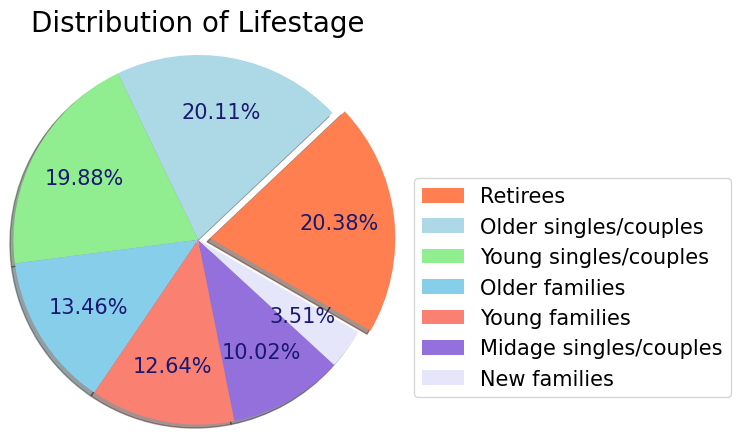

In [28]:
# Plot a pie chart of LIFESTAGE
plt.figure(figsize=(4,4))
colors = ['coral', 'lightblue', 'lightgreen', 'skyblue', 'salmon', 'mediumpurple', 'lavender']
plt.pie(purchase_behaviour["LIFESTAGE"].value_counts(), colors=colors, shadow=True, explode=(0.1,0,0,0,0,0,0),
                                              textprops= {'fontsize':15,'color':'midnightblue'},
                                              radius=1.5, autopct='%.2f%%', pctdistance=0.7, startangle=-30)
plt.legend(purchase_behaviour["LIFESTAGE"].value_counts().index.str.capitalize(), fontsize=15,
                                                                        loc=2, 
                                                                        bbox_to_anchor=(1.2,0.7),borderaxespad = 0.)
plt.title("Distribution of Lifestage", y=1.15, fontsize=20)

In [29]:
result = purchase_behaviour.groupby('PREMIUM_CUSTOMER').size().reset_index(name='N').sort_values(by='N', ascending=False)

print(result)

  PREMIUM_CUSTOMER      N
1       Mainstream  29245
0           Budget  24470
2          Premium  18922


Text(0.5, 1.15, 'Distribution of Customer Type')

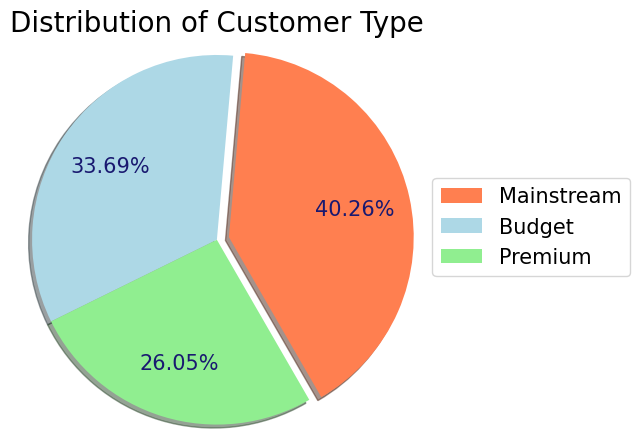

In [30]:
# Plot a pie chart of PREMIUM_CUSTOMER
plt.figure(figsize=(4,4))
colors = ['coral', 'lightblue', 'lightgreen']
plt.pie(purchase_behaviour["PREMIUM_CUSTOMER"].value_counts(), colors=colors, shadow=True, explode=(0.1,0,0),
                                                     textprops= {'fontsize':15,'color':'midnightblue'},
                                                     radius=1.5, autopct='%.2f%%', pctdistance=0.7, startangle=-60)
plt.legend(purchase_behaviour["PREMIUM_CUSTOMER"].value_counts().index, fontsize=15,
                                                       loc=2, bbox_to_anchor=(1.2,0.7),borderaxespad = 0.)
plt.title("Distribution of Customer Type", y=1.15, fontsize=20)

There are 72637 customer sample in this table. Among these customers, the majority are retirees, 20.38%, while the number of new families is the least, only 3.51%. For customer type, Mainstream customers account for the largest proportion，followed by Budget customers, and finally by the Premium customers.

In [31]:
# Merge transaction data to customer data
merge_data = pd.merge(transaction_data,purchase_behaviour,on="LYLTY_CARD_NBR")
merge_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE_x,PREMIUM_CUSTOMER_x,LIFESTAGE_y,PREMIUM_CUSTOMER_y
0,2018-07-01,35,35143,31702,22,Thins Chips Originl saltd 175g,175,Thins,1,3.3,NaN,NaN,RETIREES,Mainstream
1,2018-12-15,35,35143,31703,23,Cheezels Cheese 330g,330,Cheezels,1,5.7,NaN,NaN,RETIREES,Mainstream
2,2018-07-01,174,174315,175432,71,Twisties Cheese Burger 250g,250,Twisties,2,8.6,NaN,NaN,OLDER SINGLES/COUPLES,Premium
3,2018-11-09,174,174315,175433,15,Twisties Cheese 270g,270,Twisties,2,9.2,NaN,NaN,OLDER SINGLES/COUPLES,Premium
4,2019-02-11,174,174315,175434,17,Kettle Sensations BBQ&Maple 150g,150,Kettle,2,9.2,NaN,NaN,OLDER SINGLES/COUPLES,Premium


In [42]:
# Check if some customers were not matched on by checking for nulls
merge_data.isna().sum()

DATE                       0
STORE_NBR                  0
LYLTY_CARD_NBR             0
TXN_ID                     0
PROD_NBR                   0
PROD_NAME                  0
PROD_SIZE                  0
BRAND_NAME                 0
PROD_QTY                   0
TOT_SALES                  0
LIFESTAGE_x           264834
PREMIUM_CUSTOMER_x    264834
LIFESTAGE_y                0
PREMIUM_CUSTOMER_y         0
dtype: int64

In [43]:
# Delete LIFESTAGE_x dan PREMIUM_CUSTOMER_x
merge_data = merge_data.drop(columns=['LIFESTAGE_x', 'PREMIUM_CUSTOMER_x'])
# Delete LIFESTAGE_y to LIFESTAGE dan PREMIUM_CUSTOMER_y to PREMIUM_CUSTOMER
merge_data = merge_data.rename(columns={'LIFESTAGE_y': 'LIFESTAGE', 'PREMIUM_CUSTOMER_y': 'PREMIUM_CUSTOMER'})
print(merge_data.isna().sum())


DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_SIZE           0
BRAND_NAME          0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [44]:
# save as csv
merge_data.to_csv("merge_data.csv")

### Data analysis and customer segments

Once the data is ready to be analyzed, it is possible to determine some metrics of interest to the client:<br>
* Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is ?<br>
* How many customers are in each segment ? <br>
* How many chips are bought per customer by segment ?<br>
* What's the average chip price by customer segment ?<br>

* The customer's total spend over the period and total spend for each transaction to understand what proportion of their grocery spend is on chips<br>
* Proportion of customers in each customer segment overall to compare against the mix of customers who purchase chips

### 1）Total sales

In [45]:
#  Calculate the total sales by those dimensions
totsales = pd.DataFrame(merge_data.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])["TOT_SALES"].sum())
totsales

TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
MIDAGE SINGLES/COUPLES Budget             35514.80
                       Mainstream         90803.85
                       Premium            58432.65
NEW FAMILIES           Budget             21928.45
                       Mainstream         17013.90
                       Premium            11491.10
OLDER FAMILIES         Budget            168363.25
                       Mainstream        103445.55
                       Premium            80658.40
OLDER SINGLES/COUPLES  Budget            136769.80
                       Mainstream        133393.80
                       Premium           132263.15
RETIREES               Budget            113147.80
                       Mainstream        155677.05
                       Premium            97646.05
YOUNG FAMILIES         Budget            139345.85
                       Mainstream         92788.75
                       Premium            84025.50
YOUNG SINGLES/COUPLES  Budget             61141.60
                       Mainstream        157621.60
                       Premium            41642.10

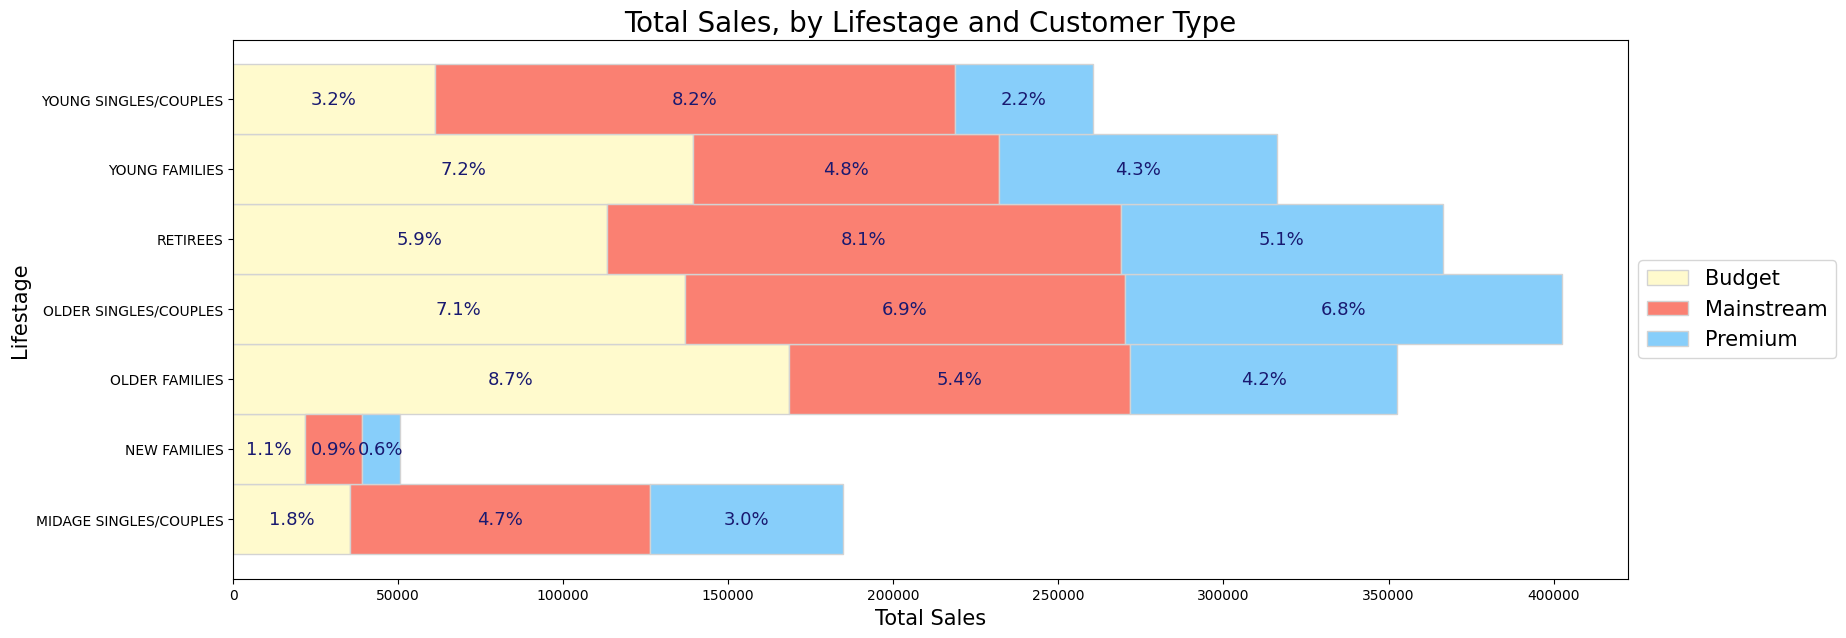

In [46]:
bars1 = totsales[totsales.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]["TOT_SALES"]
bars2 = totsales[totsales.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]["TOT_SALES"]
bars3 = totsales[totsales.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]["TOT_SALES"]
 
bars1_text = (bars1 / sum(totsales["TOT_SALES"])).apply("{:.1%}".format)
bars2_text = (bars2 / sum(totsales["TOT_SALES"])).apply("{:.1%}".format)
bars3_text = (bars3 / sum(totsales["TOT_SALES"])).apply("{:.1%}".format)
 
# Names of group and bar width
names = totsales.index.get_level_values("LIFESTAGE").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(18,7)) 

colors = ['salmon', 'lemonchiffon', 'lightskyblue']
# Create yellow bars
budget_bar = plt.barh(r, bars1, color=colors[1], edgecolor="lightgrey", height=1, label="Budget")
# Create red bars (middle)
mains_bar = plt.barh(r, bars2, left=bars1, color=colors[0], edgecolor="lightgrey", height=1, label="Mainstream")
# Create blue bars (top)
prem_bar = plt.barh(r, bars3, left=pd.concat([bars1, bars2]).groupby("LIFESTAGE").sum(), color=colors[2], edgecolor="lightgrey", height=1, label="Premium")

for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, bars1_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_width + mains_bar[i].get_width()/2, i, bars2_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, bars3_text[i], va='center', ha='center', size=13, color='midnightblue')
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("Lifestage",fontsize=15)
plt.xlabel("Total Sales",fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=15)

plt.title("Total Sales, by Lifestage and Customer Type",fontsize=20)

# Show graphic
plt.show()

Most sales by lifestage :  <br>
* Budget - Older Families<br>
* Mainstream - Retirees<br>
* Premium -  Older Singles/Couple<br>

### 2）Customer counts 

In [47]:
#  Calculate the customer count
count = pd.DataFrame(purchase_behaviour.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"]).count())
count.columns=["CUSTOMER_COUNTS"]
count

CUSTOMER_COUNTS
LIFESTAGE              PREMIUM_CUSTOMER                 
MIDAGE SINGLES/COUPLES Budget                       1504
                       Mainstream                   3340
                       Premium                      2431
NEW FAMILIES           Budget                       1112
                       Mainstream                    849
                       Premium                       588
OLDER FAMILIES         Budget                       4675
                       Mainstream                   2831
                       Premium                      2274
OLDER SINGLES/COUPLES  Budget                       4929
                       Mainstream                   4930
                       Premium                      4750
RETIREES               Budget                       4454
                       Mainstream                   6479
                       Premium                      3872
YOUNG FAMILIES         Budget                       4017
                       Mainstream                   2728
                       Premium                      2433
YOUNG SINGLES/COUPLES  Budget                       3779
                       Mainstream                   8088
                       Premium                      2574

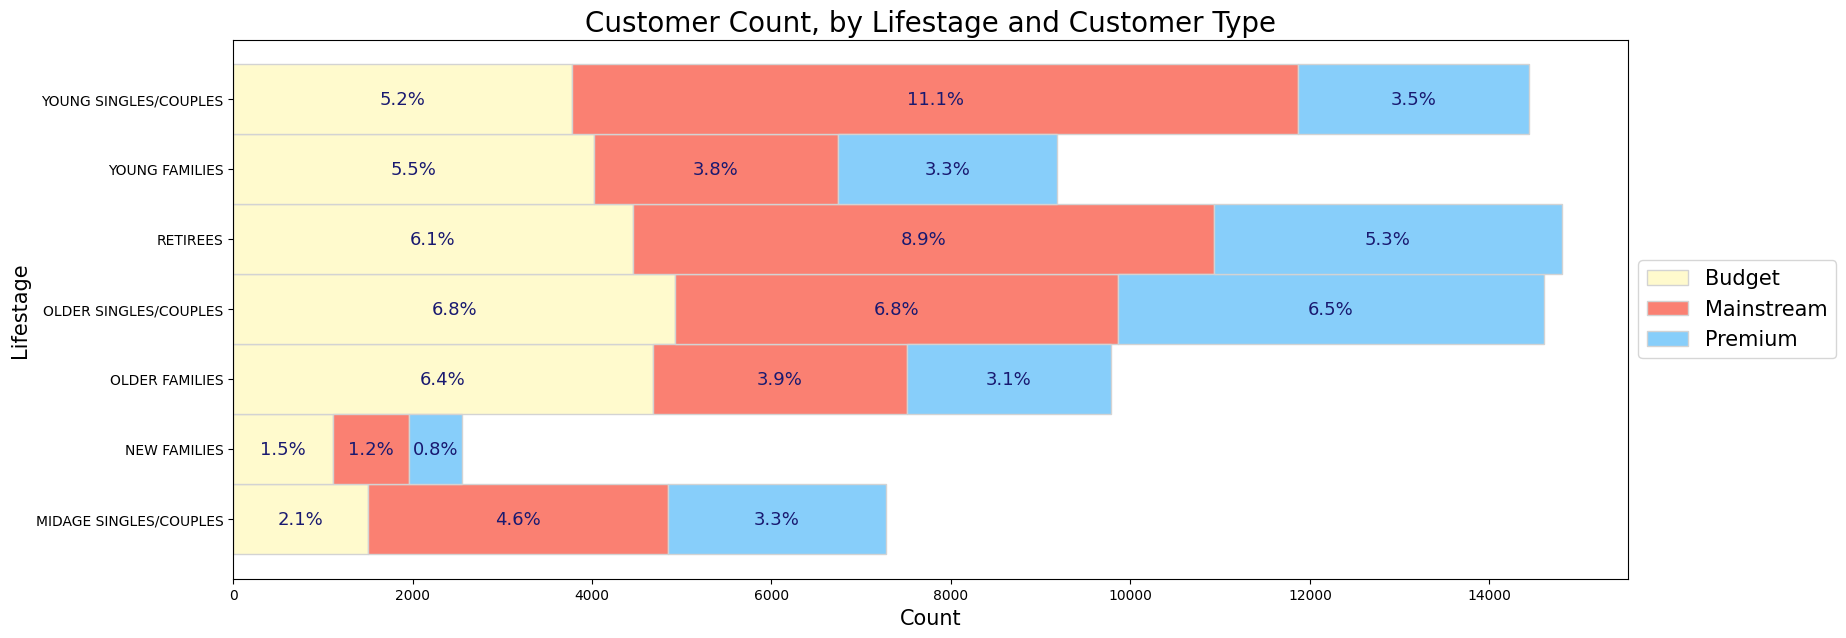

In [48]:
bars1 = count[count.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]["CUSTOMER_COUNTS"]
bars2 = count[count.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]["CUSTOMER_COUNTS"]
bars3 = count[count.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]["CUSTOMER_COUNTS"]
 
bars1_text = (bars1 / sum(count["CUSTOMER_COUNTS"])).apply("{:.1%}".format)
bars2_text = (bars2 / sum(count["CUSTOMER_COUNTS"])).apply("{:.1%}".format)
bars3_text = (bars3 / sum(count["CUSTOMER_COUNTS"])).apply("{:.1%}".format)
 
# Names of group and bar width
names = count.index.get_level_values("LIFESTAGE").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(18,7)) 

colors = ['salmon', 'lemonchiffon', 'lightskyblue']
# Create yellow bars
budget_bar = plt.barh(r, bars1, color=colors[1], edgecolor="lightgrey", height=1, label="Budget")
# Create red bars (middle)
mains_bar = plt.barh(r, bars2, left=bars1, color=colors[0], edgecolor="lightgrey", height=1, label="Mainstream")
# Create blue bars (top)
prem_bar = plt.barh(r, bars3, left=pd.concat([bars1, bars2]).groupby("LIFESTAGE").sum(), color=colors[2], edgecolor="lightgrey", height=1, label="Premium")
 
for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, bars1_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_width + mains_bar[i].get_width()/2, i, bars2_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, bars3_text[i], va='center', ha='center', size=13, color='midnightblue')
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("Lifestage",fontsize=15)
plt.xlabel("Count",fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=15)

plt.title("Customer Count, by Lifestage and Customer Type",fontsize=20)

# Show graphic
plt.show()

it is known that there are more 
Mainstream people - young singles/couples and Mainstream retirees who are buying the chips.
This contributes to more sales for these customer segments, but it is not the main driver for the Budget segment - Older families.

### 3）Average Sales Quantity

In [49]:
# Calculate the average number of units per customer by those two dimensions
avg_quantity_sales = pd.merge(totsales,count,on=["LIFESTAGE","PREMIUM_CUSTOMER"])
avg_quantity_sales['SALES_QTY'] = merge_data.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])["PROD_QTY"].sum()
avg_quantity_sales['AVG_SALES_QTY'] = (avg_quantity_sales["SALES_QTY"]/avg_quantity_sales["CUSTOMER_COUNTS"])
avg_quantity_sales

TOT_SALES  CUSTOMER_COUNTS  \
LIFESTAGE              PREMIUM_CUSTOMER                               
MIDAGE SINGLES/COUPLES Budget             35514.80             1504   
                       Mainstream         90803.85             3340   
                       Premium            58432.65             2431   
NEW FAMILIES           Budget             21928.45             1112   
                       Mainstream         17013.90              849   
                       Premium            11491.10              588   
OLDER FAMILIES         Budget            168363.25             4675   
                       Mainstream        103445.55             2831   
                       Premium            80658.40             2274   
OLDER SINGLES/COUPLES  Budget            136769.80             4929   
                       Mainstream        133393.80             4930   
                       Premium           132263.15             4750   
RETIREES               Budget            113147.80             4454   
                       Mainstream        155677.05             6479   
                       Premium            97646.05             3872   
YOUNG FAMILIES         Budget            139345.85             4017   
                       Mainstream         92788.75             2728   
                       Premium            84025.50             2433   
YOUNG SINGLES/COUPLES  Budget             61141.60             3779   
                       Mainstream        157621.60             8088   
                       Premium            41642.10             2574   

                                         SALES_QTY  AVG_SALES_QTY  
LIFESTAGE              PREMIUM_CUSTOMER                            
MIDAGE SINGLES/COUPLES Budget                 9496       6.313830  
                       Mainstream            22699       6.796108  
                       Premium               15526       6.386672  
NEW FAMILIES           Budget                 5571       5.009892  
                       Mainstream             4319       5.087161  
                       Premium                2957       5.028912  
OLDER FAMILIES         Budget                45065       9.639572  
                       Mainstream            27756       9.804309  
                       Premium               21771       9.573879  
OLDER SINGLES/COUPLES  Budget                35220       7.145466  
                       Mainstream            34997       7.098783  
                       Premium               33986       7.154947  
RETIREES               Budget                28764       6.458015  
                       Mainstream            40518       6.253743  
                       Premium               24884       6.426653  
YOUNG FAMILIES         Budget                37111       9.238486  
                       Mainstream            25044       9.180352  
                       Premium               22406       9.209207  
YOUNG SINGLES/COUPLES  Budget                16671       4.411485  
                       Mainstream            38632       4.776459  
                       Premium               11331       4.402098

Text(0, 0.5, 'Average Sales Quantity')

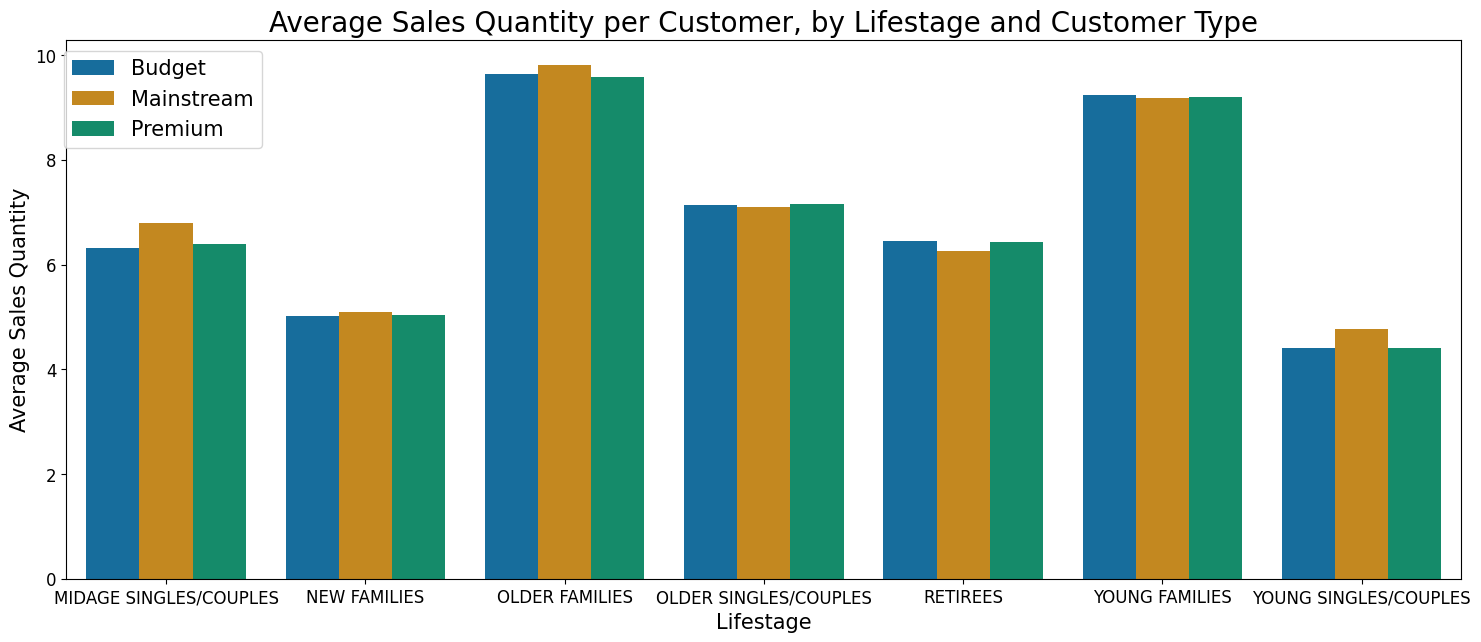

In [50]:
# Plot the average number of units per customer by those two dimensions
plt.figure(figsize=(18,7))
plt.tick_params(labelsize=12)
sns.barplot(x=avg_quantity_sales.reset_index()["LIFESTAGE"], y=avg_quantity_sales.reset_index()["AVG_SALES_QTY"], 
            hue=avg_quantity_sales.reset_index()["PREMIUM_CUSTOMER"], 
            palette=sns.color_palette("colorblind", 3))
plt.title("Average Sales Quantity per Customer, by Lifestage and Customer Type",fontsize=20)
plt.legend(fontsize=15, bbox_to_anchor=(0.14,0.98),borderaxespad = 0.)
plt.xlabel("Lifestage",fontsize=15)
plt.ylabel("Average Sales Quantity",fontsize=15)

Older families and young families in general buy more chips per customer.

### 4）Average sales price

In [51]:
# Calculate the average price per unit sold (average sale price) by those two customer dimensions
avg_quantity_sales['AVG_SALES_PRICE'] = (avg_quantity_sales["TOT_SALES"]/avg_quantity_sales["SALES_QTY"])
avg_quantity_sales

TOT_SALES  CUSTOMER_COUNTS  \
LIFESTAGE              PREMIUM_CUSTOMER                               
MIDAGE SINGLES/COUPLES Budget             35514.80             1504   
                       Mainstream         90803.85             3340   
                       Premium            58432.65             2431   
NEW FAMILIES           Budget             21928.45             1112   
                       Mainstream         17013.90              849   
                       Premium            11491.10              588   
OLDER FAMILIES         Budget            168363.25             4675   
                       Mainstream        103445.55             2831   
                       Premium            80658.40             2274   
OLDER SINGLES/COUPLES  Budget            136769.80             4929   
                       Mainstream        133393.80             4930   
                       Premium           132263.15             4750   
RETIREES               Budget            113147.80             4454   
                       Mainstream        155677.05             6479   
                       Premium            97646.05             3872   
YOUNG FAMILIES         Budget            139345.85             4017   
                       Mainstream         92788.75             2728   
                       Premium            84025.50             2433   
YOUNG SINGLES/COUPLES  Budget             61141.60             3779   
                       Mainstream        157621.60             8088   
                       Premium            41642.10             2574   

                                         SALES_QTY  AVG_SALES_QTY  \
LIFESTAGE              PREMIUM_CUSTOMER                             
MIDAGE SINGLES/COUPLES Budget                 9496       6.313830   
                       Mainstream            22699       6.796108   
                       Premium               15526       6.386672   
NEW FAMILIES           Budget                 5571       5.009892   
                       Mainstream             4319       5.087161   
                       Premium                2957       5.028912   
OLDER FAMILIES         Budget                45065       9.639572   
                       Mainstream            27756       9.804309   
                       Premium               21771       9.573879   
OLDER SINGLES/COUPLES  Budget                35220       7.145466   
                       Mainstream            34997       7.098783   
                       Premium               33986       7.154947   
RETIREES               Budget                28764       6.458015   
                       Mainstream            40518       6.253743   
                       Premium               24884       6.426653   
YOUNG FAMILIES         Budget                37111       9.238486   
                       Mainstream            25044       9.180352   
                       Premium               22406       9.209207   
YOUNG SINGLES/COUPLES  Budget                16671       4.411485   
                       Mainstream            38632       4.776459   
                       Premium               11331       4.402098   

                                         AVG_SALES_PRICE  
LIFESTAGE              PREMIUM_CUSTOMER                   
MIDAGE SINGLES/COUPLES Budget                   3.739975  
                       Mainstream               4.000346  
                       Premium                  3.763535  
NEW FAMILIES           Budget                   3.936178  
                       Mainstream               3.939315  
                       Premium                  3.886067  
OLDER FAMILIES         Budget                   3.736009  
                       Mainstream               3.726962  
                       Premium                  3.704855  
OLDER SINGLES/COUPLES  Budget                   3.883299  
                       Mainstream               3.811578  
                       Premium                  3.89

Text(0, 0.5, 'Average Sales Price')

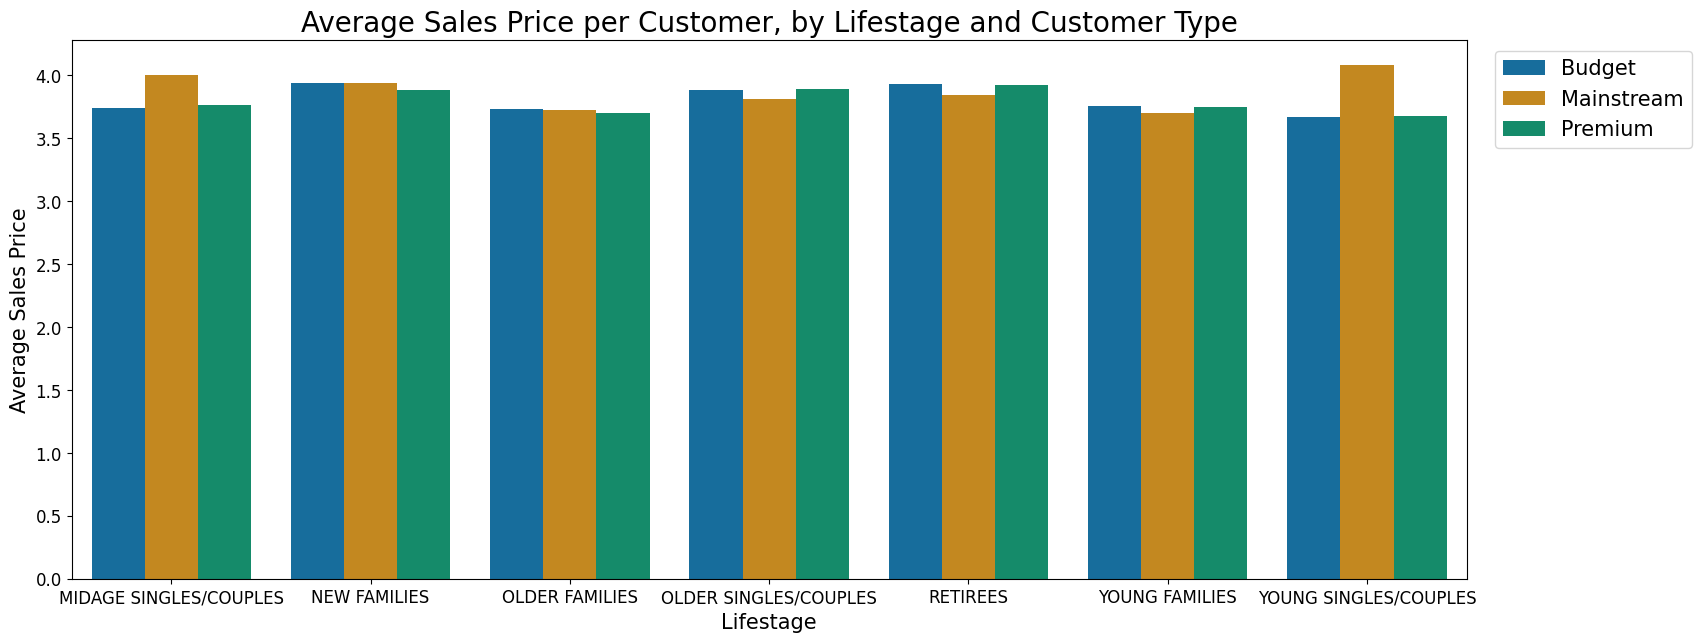

In [52]:
# Plot the average price per unit sold (average sale price) by those two customer dimensions.
plt.figure(figsize=(18,7))
plt.tick_params(labelsize=12)
sns.barplot(x=avg_quantity_sales.reset_index()["LIFESTAGE"], y=avg_quantity_sales.reset_index()["AVG_SALES_PRICE"], 
            hue=avg_quantity_sales.reset_index()["PREMIUM_CUSTOMER"], 
            palette=sns.color_palette("colorblind", 3))
plt.title("Average Sales Price per Customer, by Lifestage and Customer Type",fontsize=20)
plt.legend(fontsize=15, bbox_to_anchor=(1.02,0.98),borderaxespad = 0.)
plt.xlabel("Lifestage",fontsize=15)
plt.ylabel("Average Sales Price",fontsize=15)

Mainstream midage and young singles/couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

## D. Deep dive into specific customer segments for insights

at this stage target the customer segments that contribute the most to sales to maintain or increase sales. at Mainstream - young singles/couples. 

In [53]:
# Brands and product sizes of 'Mainstream - young singles/couples' Segment and other segments
s = pd.DataFrame(merge_data.loc[:,["LYLTY_CARD_NBR","LIFESTAGE","PREMIUM_CUSTOMER","BRAND_NAME","PROD_SIZE","PROD_QTY"]])
m_ysc = s[(s["LIFESTAGE"]=="YOUNG SINGLES/COUPLES")&(s["PREMIUM_CUSTOMER"]=="Mainstream")]
m_ysc.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,BRAND_NAME,PROD_SIZE,PROD_QTY
11,220035,YOUNG SINGLES/COUPLES,Mainstream,Pringles,134,2
12,220035,YOUNG SINGLES/COUPLES,Mainstream,Thins,175,2
13,220035,YOUNG SINGLES/COUPLES,Mainstream,Smith,150,2
14,33053,YOUNG SINGLES/COUPLES,Mainstream,CCs,175,2
15,33053,YOUNG SINGLES/COUPLES,Mainstream,Cheezels,330,2


In [55]:
# Most popular Brands and Product Sizes in this segment
m_ysc["BRAND_NAME"].value_counts().head()

BRAND_NAME
Kettle      3844
Pringles    2315
Doritos     2238
Smiths      1857
Thins       1166
Name: count, dtype: int64

In [56]:
# Most popular product sizes
m_ysc["PROD_SIZE"].value_counts().head()

PROD_SIZE
175    4997
150    3241
134    2315
110    2051
170    1575
Name: count, dtype: int64

The best-selling brands in 'Mainstream - young singles/couples' Segment are Kettle, Doritos, and Pringles.<br>
For product sizes, 175g, 150g, and 134g are the most popular choices.

## 5. Recommendations

A. Brands 

TOP 3 best selling brands 
1. Kettle
2. Smith
3. Doritos

TOP 3 total sales for each product size 
1. 175g
2. 150g
3. 134g

B. Customer 

TOP 3 lifestage
1. Retirees 20.38%
2. Older Singles/Couples 20.11%
3. Young Singles/Couples 19.88%

TOP 3 Customer type
1. Mainstream 40.26%
2. Budget 33.69%
3.  Premium 26.05%

C. Total Sales 

TOP 3 sales driver segments 
1. Budget - Older Families (higher quantity per customer in older families)
2. Mainstream - Young Singles/Couples (higher customer counts and higher average purchase price)
3. Mainstream - Retirees (higher customer counts)


D. Target segment

TOP 3 best-selling brands 
1. Kettle
2. Pringles
3. Doritos

TOP 3 best-selling product sizes 
1. 175g
2. 150g
3. 134g

Recomendations

A.  General <br>
    Increase sales promotion of Kettle (all size) and 175g (all brands) chips

B. Target segments <br>
   Budget - Older Families <br>
   Promotion like 'Buy Two Get One Free' 
    ->Because of their higher average purchase quantity, promotions like this can boost sales.

C. Mainstream - Young Singles/Couples 
   1. Target advertisements 
    -> This segment has the majority of customers and thus should be the focus of our marketing. Targeted advertising around areas such as colleges and universities is probably a good strategy.<br>
   2. Change the display area 
    ->Placing some chips next to other young people’s daily necessities will also attract their attention, thereby increasing sales.
   3.  Promotion and repackaging on popular brands and sizes 
    -> In addition to Kettle and 175g chips, which is popular among all segments, Doritos and Pringles are popular in this segement. Therefore, we can increase promotion of these chips as well as advice their productors and Suppliers to repackage their products. For instance, they can use more vibrant colors and fonts to gain love from young people. Meanwhile, similar strategy is also useful for 150g and 134g chips.
   4.  Strategies metioned above can be used in combination to maximize the effect.

D. Mainstream - Retirees 
   1. Target advertisements ->  Similar to last segment, we can put targeted advertising because of the large number of customers. 
   2. Limited time sales promotions during daytime -> Retired customers are more inclined to shop during daytime, so we can choose products that are popular in this segment for promotion when these customers visit.